http://earthpy.org/time_series_analysis_with_pandas_part_2.html

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import scipy.stats as sp
import statsmodels.api as sm
from pandas.stats.api import ols
from datetime import datetime
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [2]:
Muddy_Creek = pd.read_csv("C:\\PROJECTS\\MLSNF\\Data\\Hydrology\\ST09330500.txt", 
                          sep = "\t", skiprows=28, index_col='date_time', parse_dates=True, 
                          names = ['agency','site_no','date_time', 'value', 'remark'], na_values=['Ice',' '])
Muddy_Creek = Muddy_Creek.drop(['agency'], axis=1)
Muddy_Creek['mon']=Muddy_Creek.index.month

IOError: File C:\PROJECTS\MLSNF\Data\Hydrology\ST09330500.txt does not exist

In [ ]:
Salina_Creek = pd.read_csv("C:\\PROJECTS\\MLSNF\\Data\\Hydrology\\ST10205030.txt", 
                          sep = "\t", skiprows=28, index_col='date_time', parse_dates=True, 
                          names = ['agency','site_no','date_time', 'value', 'remark'], na_values=['Ice',' '])
Salina_Creek = Salina_Creek.drop(['agency'], axis=1)
Salina_Creek['mon']=Salina_Creek.index.month

In [ ]:
def boxandscatter(station, yr=1930):
    station = eval(station)
    station.boxplot(column=['value'], by='mon')
    dfmon = station.resample('M',how='mean')
    plt.scatter(dfmon['mon'][dfmon.index.year==yr],dfmon['value'][dfmon.index.year==yr], c='purple')
    plt.ylim(0.01,1000)
    plt.ylabel('discharge (cfs)')
    plt.xlabel('month')
    plt.yscale('log')

In [ ]:
stations = ['Muddy_Creek','Salina_Creek']

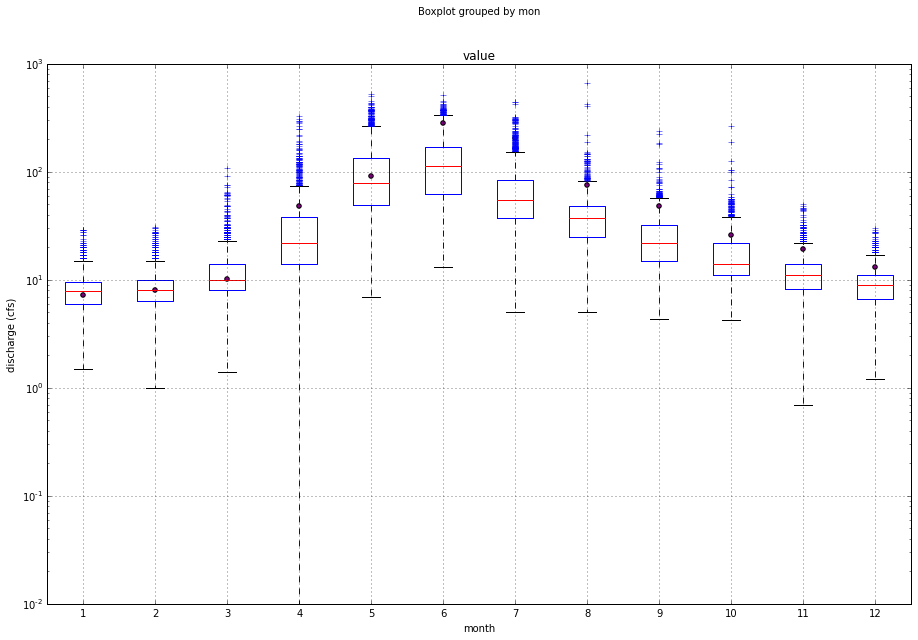

In [166]:
cd = interact(boxandscatter, station=stations, yr=(1990, 2015, 1))

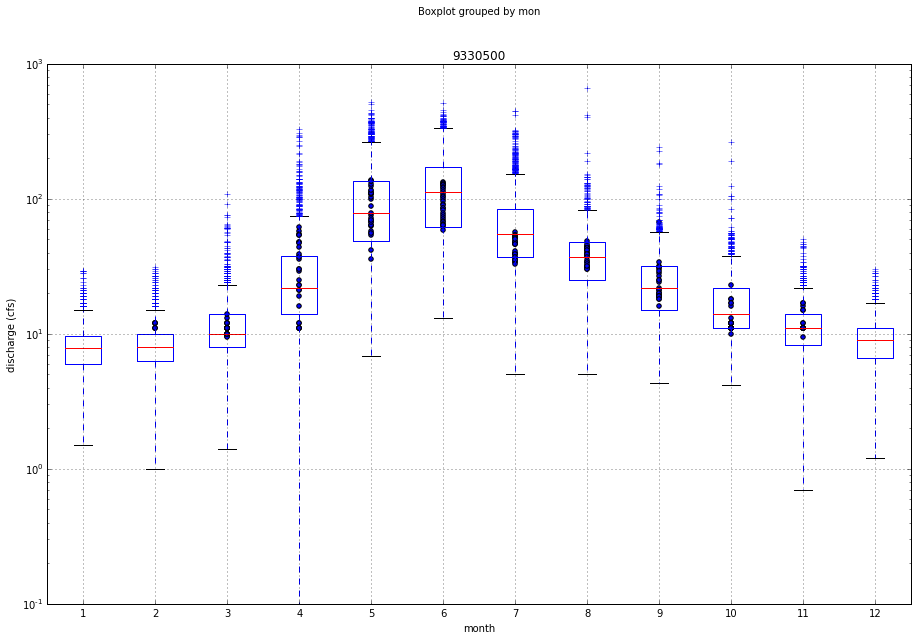

In [112]:
Muddy_Creek.boxplot(column=['value'], by='mon')

Muddy_Creek
plt.scatter(Muddy_Creek['mon'][Muddy_Creek.index.year==2014],Muddy_Creek.value[Muddy_Creek.index.year==2014])
plt.xlabel('month')
plt.yscale('log')
plt.ylabel('discharge (cfs)')
plt.title(Muddy_Creek['site_no'][0])

In [90]:
from IPython.html.widgets import interact

In [104]:
def kp(month=1, wind=1):
    pd.rolling_mean(Muddy_Creek['value'][Muddy_Creek.mon==month], window=wind).plot(ylim=(0.01,1000))
    plt.yscale('log')

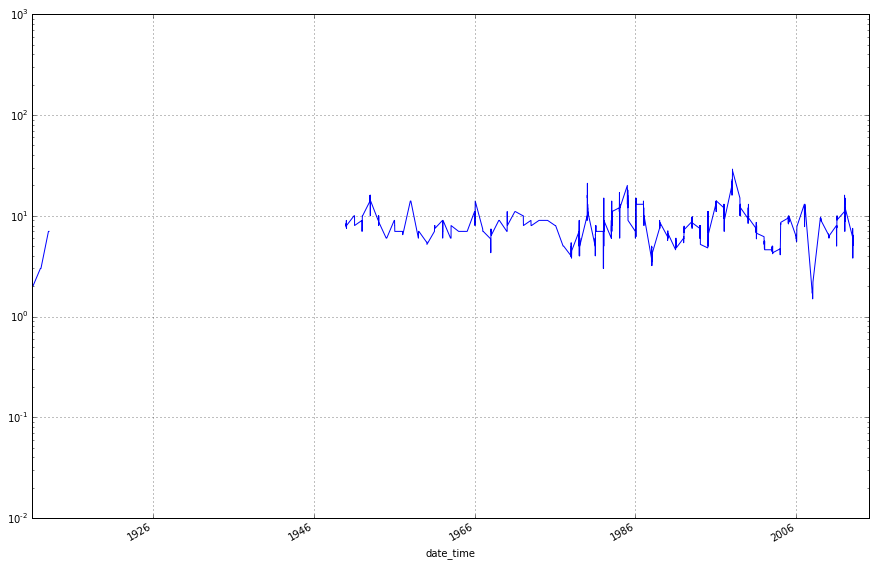

In [107]:
cc = interact(kp, month=(1, 12, 1), wind=(1,100,10))

In [72]:
Muddy_Creek_monthly = Muddy_Creek.resample('M', how='mean')
Muddy_Creek_monthly['baseflow'] = pd.rolling_min(Muddy_Creek_monthly['value'],window=11,center=True)

In [74]:
Salina_Creek['baseflow'] = pd.rolling_min(Salina_Creek['value'],window=250,center=True)

In [76]:
print(Muddy_Creek_mo_group)